In [1]:
using PyPlot,Seismic

# Show how to dowload small data sets for test and plot them

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  109k  100  109k    0     0  6870k      0 --:--:-- --:--:-- --:--:-- 7304k


number of traces: 50

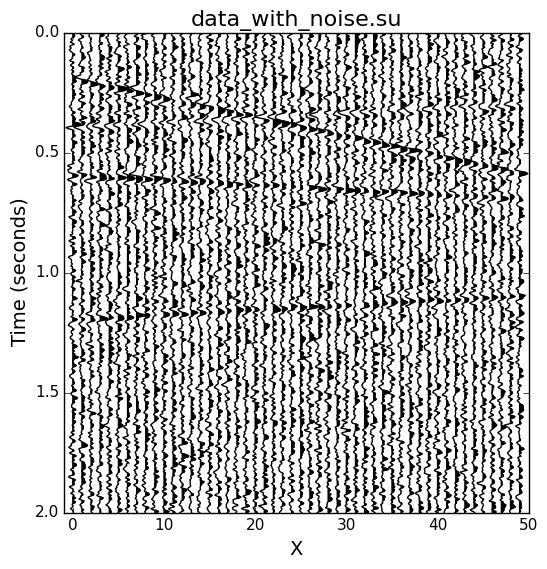


number of samples per trace: 501


/Users/msacchi/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [2]:
download("http://seismic.physics.ualberta.ca/data/data_with_noise.su","data_with_noise.su");
SegyToSeis("data_with_noise.su","data_with_noise",format="su",input_type="ieee");
d,h,ext = SeisRead("data_with_noise");
plotpar = Dict(:style=>"wiggles",
           :vmin=>-5,:vmax=>5,
           :xlabel=>"X",:dx=>1,
           :ylabel=>"Time",:yunits=>"(seconds)",:oy=>0,:dy=>h[1].d1,
           :cmap=>"gray",
           :title=>"data_with_noise.su");
SeisPlot(d;plotpar...);

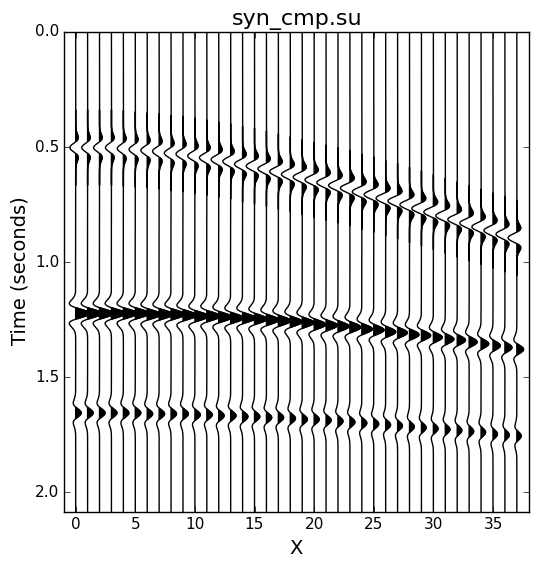

number of traces: 38
number of samples per trace: 522


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 88464  100 88464    0     0  5890k      0 --:--:-- --:--:-- --:--:-- 6170k


In [4]:
download("http://seismic.physics.ualberta.ca/data/syn_cmp.su","syn_cmp.su");
SegyToSeis("syn_cmp.su","syn_cmp",format="su", input_type="ieee");
d,h,ext = SeisRead("syn_cmp");
plotpar = Dict(:style=>"wiggles",
           :vmin=>-2,:vmax=>2,
           :xlabel=>"X",:dx=>1,
           :ylabel=>"Time",:yunits=>"(seconds)",:oy=>0,:dy=>h[1].d1,
           :cmap=>"gray",
           :title=>"syn_cmp.su");
SeisPlot(d;plotpar...);

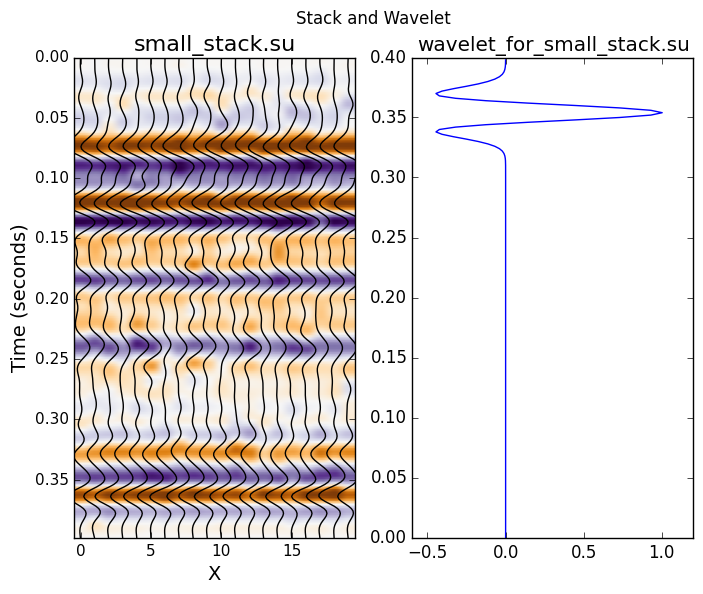

number of traces: 20
number of samples per trace: 200
number of traces: 1
number of samples per trace: 45


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20800  100 20800    0     0  2304k      0 --:--:-- --:--:-- --:--:-- 2539k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   420  100   420    0     0  63540      0 --:--:-- --:--:-- --:--:-- 70000


In [5]:
download("http://seismic.physics.ualberta.ca/data/small_stack.su","small_stack.su");
SegyToSeis("small_stack.su","small_stack",format="su",input_type="ieee");
d,h,ext = SeisRead("small_stack");
nt = size(d,1);
dt = h[1].d1;
download("http://seismic.physics.ualberta.ca/data/wavelet_for_small_stack.su",
    "wavelet_for_small_stack.su");
SegyToSeis("wavelet_for_small_stack.su","wavelet_for_small_stack",format="su",input_type="ieee");
w,h_wav,e_wav = SeisRead("wavelet_for_small_stack");
nt_wav = size(w,1);
plotpar = Dict(:xlabel=>"X",:dx=>1,
           :ylabel=>"Time",:yunits=>"(seconds)",:oy=>0,:dy=>h[1].d1,
           :cmap=>"PuOr",:fignum=>1,
           :title=>"small_stack.su");

subplot(122);
wlong = hcat(w[:]', zeros(nt-nt_wav)');
ax = gca();
ax[:invert_yaxis]();  

plot(wlong',collect(nt-1:-1:0)*dt);
title("wavelet_for_small_stack.su");
suptitle("Stack and Wavelet");
ax = gca();
ax[:invert_yaxis](); 

subplot(121);
SeisPlot(d; style="overlay",plotpar...);

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

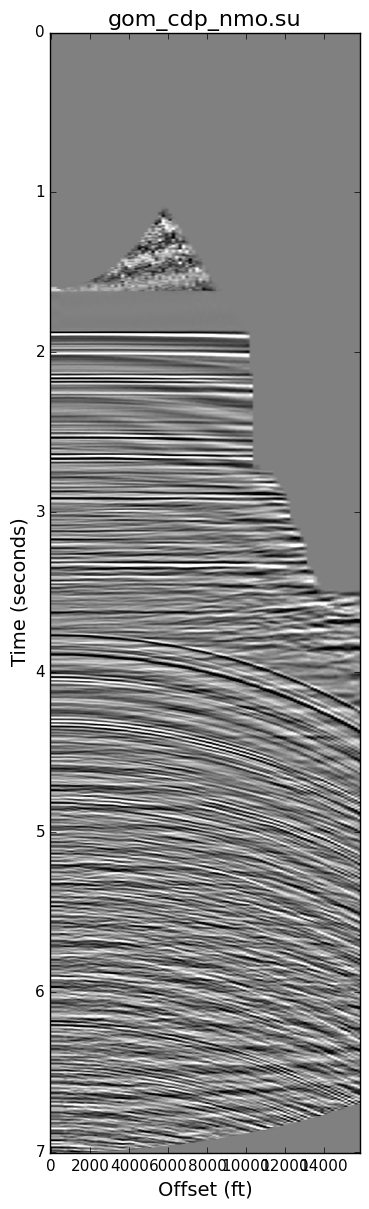

number of traces: 92
number of samples per trace: 1751


100  650k  100  650k    0     0  10.1M      0 --:--:-- --:--:-- --:--:-- 10.2M


In [16]:
download("http://seismic.physics.ualberta.ca/data/gom_cdp_nmo.su","gom_cdp_nmo.su");
SegyToSeis("gom_cdp_nmo.su","gom_cdp_nmo",format="su",input_type="ieee");
d,h,ext = SeisRead("gom_cdp_nmo");
nx = length(h);
dx = abs.(h[end].h - h[1].h)/nx;
plotpar = Dict(           
           :xlabel=>"Offset",:xunits=>"(ft)",:dx=>dx,
           :ylabel=>"Time",:yunits=>"(seconds)",:oy=>0,:dy=>h[1].d1,
           :cmap=>"gray",
           :title=>"gom_cdp_nmo.su",
           :fignum=>1);

figure(1, figsize=(4,14);)
SeisPlot(d; plotpar...);